In [2]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics

# API

In [3]:
import requests

def readApi(url, params, headers):
    return str(requests.get(url, params, headers=headers).json())

In [4]:
import json

### Setting up request and calling the api endpoint 

In [5]:
# https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=temperature_2m,precipitation_probability,precipitation&timezone=Europe%2FBerlin&start_date={startDate}&end_date={endDate}&format=flatbuffers

# lyngby lat:55.775 - lon:12.501944
lat = 55.775
lon = 12.501944
# year month date. Format: YYYY-MM-DD
startDate = "2024-01-02"
endDate = "2024-02-06"

url = "https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=temperature_2m,precipitation_probability,precipitation&timezone=Europe%2FBerlin&start_date={startDate}&end_date={endDate}".format(lat=lat, lon=lon, endDate=endDate, startDate=startDate)

response = readApi(url, None, None).replace('\'', '"')
response_json = json.loads(response)

### Data cleaning/formatting

<Axes: xlabel='time'>

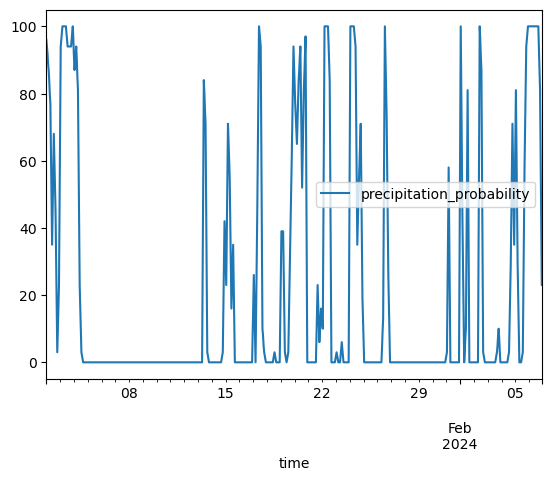

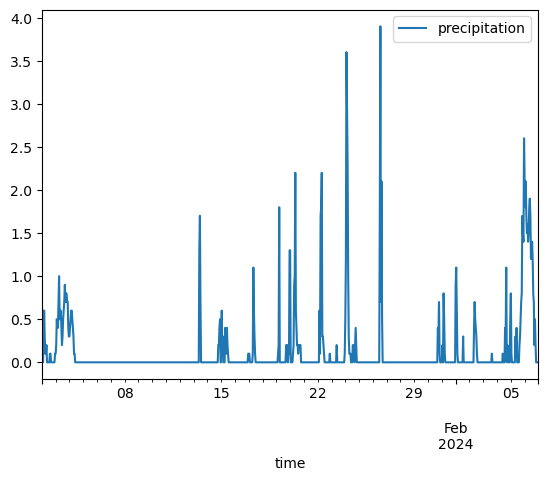

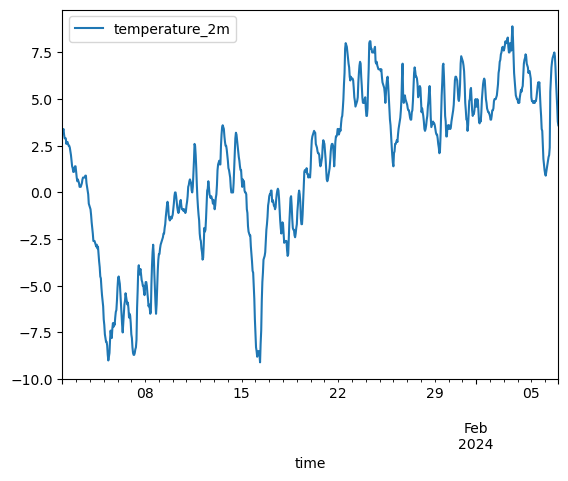

In [11]:
hourly = {
    "time": pd.to_datetime(response_json["hourly"]["time"]),
    "temperature_2m": response_json["hourly"]["temperature_2m"],
    "precipitation_probability": response_json["hourly"]["precipitation_probability"],
    "precipitation": response_json["hourly"]["precipitation"],
    "latitude": response_json["latitude"],
    "longitude": response_json["longitude"],
    "elevation": response_json["elevation"]
}
df = pd.DataFrame(hourly)
df.loc[:,["precipitation_probability", "time"]].plot(x="time")
df.loc[:,["precipitation", "time"]].plot(x="time")
df.loc[:,["temperature_2m", "time"]].plot(x="time")



# Video

In [ ]:
from pytube import YouTube

video_link = "https://www.youtube.com/watch?v=zHiWqnTWsn4"

yt = YouTube(video_link)

print("Title:", yt.title)
print("Description:", yt.description)
print("Duration (in seconds):", yt.length)
print("Views:", yt.views)
print("Rating:", yt.rating)
print("Author:", yt.author)

Title: Uncle Bob SOLID principles
Description: None
Duration (in seconds): 5015
Views: 198742
Rating: None
Author: Fuck the Communism


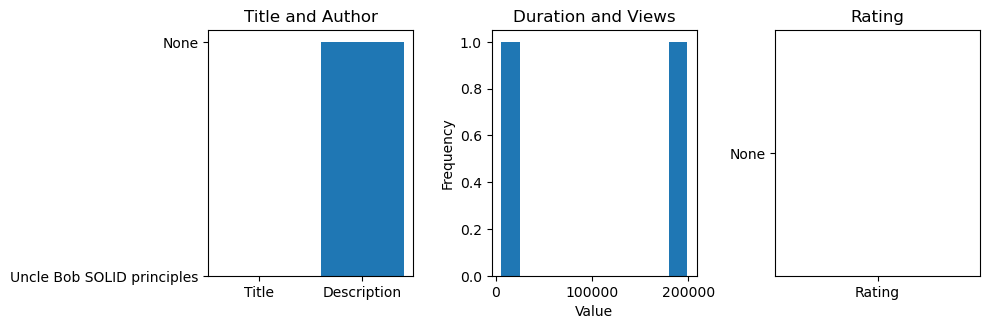

In [ ]:
# Data
attributes = ['Title', 'Description', 'Duration (seconds)', 'Views', 'Rating', 'Author']
values = ['Uncle Bob SOLID principles', 'None', 5015, 198742, 'None', 'Fuck the Communism']

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for title and author
plt.subplot(2, 3, 1)
plt.bar(attributes[:2], values[:2])
plt.title('Title and Author')

# Histogram for duration and views
plt.subplot(2, 3, 2)
plt.hist(values[2:4])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Duration and Views')

# Bar plot for rating
plt.subplot(2, 3, 3)
plt.bar(attributes[4], values[4])
plt.title('Rating')

# Adjust layout
plt.tight_layout()
plt.show()

# PDF

In [ ]:
#imports gennem terminal - conda install PyPDF2 (PDF-library)

import PyPDF2
import re

#### Tager PDF. Finder ord på 9 bogstaver. Kan tweakes til at søge efter hvad som helst i en PDF.

In [ ]:
def extract_text_from_pdf(pdf_file):
    text = ""
    with open(pdf_file, "rb") as file:
        reader = PyPDF2.PdfFileReader(file)
        num_pages = reader.numPages
        for page_num in range(num_pages):
            page = reader.getPage(page_num)
            text += page.extractText()
    return text

def find_nine_letter_words(text):
    # Use regular expression to find words with exactly nine letters
    nine_letter_words = re.findall(r'\b[a-zA-Z]{9}\b', text)
    return nine_letter_words



def main():
    pdf_file = (r"./data/Applying_UML_and_Patterns_3rd_Edition.pdf")  # Change this to your PDF file path
    text = extract_text_from_pdf(pdf_file)
    nine_letter_words = find_nine_letter_words(text)
    
    print("Nine-letter words found in the PDF:")
    for word in nine_letter_words:
        print(word)

if __name__ == "__main__":
    main()

Nine-letter words found in the PDF:
Iterative
Publisher
acclaimed
iterative
practices
introduce
essential
practices
essential
iterative
extensive
combining
iterative
including
resources
iterative
Iterative
Publisher
acclaimed
iterative
practices
introduce
essential
practices
essential
iterative
extensive
combining
iterative
including
resources
iterative
practical
designing
Iterative
Publisher
Copyright
Resources
Important
Resources
Iterative
Iterative
Waterfall
Lifecycle
Iterative
Iterative
Attitudes
Practices
Customize
Iterative
Resources
Iterative
Iterative
Inception
Inception
Inception
Inception
Artifacts
Inception
Inception
Inception
Waterfall
Organized
Artifacts
Artifacts
Resources
Scenarios
Variation
Guideline
Essential
Guideline
Guideline
Guideline
Guideline
Guideline
Iterative
Resources
Artifacts
Guideline
Inception
Guideline
Artifacts
Iterative
Resources
Iteration
Iteration
Iteration
Inception
Iteration
Guideline
Guideline
Guideline
Guideline
Guideline
Guideline
Guideline
Guid

#### Tager PDF og finder kapitler på de sider de starter på. Har sikret at vi starter data-collection på en specifik side, for at undgå at den finder det ønskede i indholdsfortegnelsen, som vil give corrupted data.

In [ ]:
import re
import PyPDF2

def find_chapters_and_pages(pdf_file):
    chapters = {}
    
    # Opdateret regex mønster til potentielt at håndtere mere komplekse kapiteloverskrifter
    chapter_pattern = re.compile(r'^\s*Chapter\s+(\S+)', re.IGNORECASE)
    
    try:
        with open(pdf_file, "rb") as file:
            reader = PyPDF2.PdfFileReader(file)
            num_pages = reader.numPages
            
            # Starter fra side 9, ignorerer de første 8 sider
            for page_num in range(35, num_pages):
                page = reader.getPage(page_num)
                text = page.extractText()
                
                lines = text.split("\n")
                for line in lines:
                    match = chapter_pattern.match(line.strip())
                    if match:
                        chapter_number = match.group(1)
                        chapter_title = f"Chapter {chapter_number}"
                        # Gemmer både kapitelnummer og sidetal
                        if chapter_title not in chapters:
                            chapters[chapter_title] = []
                        chapters[chapter_title].append(page_num + 1)  # +1 for at matche menneskelig sidetal
    except Exception as e:
        print(f"An error occurred: {e}")
    
    return chapters

def main():
    pdf_file = (r"./data/Applying_UML_and_Patterns_3rd_Edition.pdf")  # Change this to your PDF file path
    chapters = find_chapters_and_pages(pdf_file)
    
    print("Chapters found in the PDF:")
    for chapter, pages in chapters.items():
        pages_display = ', '.join(map(str, pages))
        print(f"{chapter} - Pages {pages_display}")

if __name__ == "__main__":
    main()


Chapters found in the PDF:
Chapter 1. - Pages 36
Chapter 2. - Pages 54
Chapter introduces - Pages 55, 337
Chapter 3. - Pages 87
Chapter 4. - Pages 94, 95
Chapter 5. - Pages 94, 104
Chapter 6. - Pages 94, 115
Chapter 7. - Pages 94, 175
Chapter 8. - Pages 207, 208
Chapter 9. - Pages 207, 218
Chapter 10. - Pages 207, 272
Chapter 11. - Pages 207, 286
Chapter 12. - Pages 207, 308
Chapter 13. - Pages 207, 313
Chapter 14. - Pages 207, 336
Chapter 15. - Pages 207, 346
Chapter 16. - Pages 207, 378
Chapter 17. - Pages 207, 409
Chapter 18. - Pages 207, 467
Chapter 19. - Pages 207, 512
Chapter 20. - Pages 207, 519
Chapter 21. - Pages 207, 543
Chapter for - Pages 306
Chapter 38 - Pages 422, 483
Chapter explores - Pages 481
Chapter 22. - Pages 555, 556
Chapter 23. - Pages 555, 563
Chapter 24. - Pages 555, 569
Chapter 25. - Pages 555, 576
Chapter 26. - Pages 555, 599
Chapter 27. - Pages 640, 641
Chapter 28. - Pages 640, 645
Chapter 29. - Pages 640, 657
Chapter 30. - Pages 640, 670
Chapter 31. - Pages

Top nine-letter words found in the PDF:
iteration: 246
operation: 191
interface: 184
Guideline: 171
iterative: 159
different: 147
following: 127
attribute: 121
important: 109
artifacts: 103
Therefore: 83
subsystem: 78
scenarios: 76
Iteration: 74
enterItem: 71
Iterative: 69
instances: 67
including: 64
framework: 64
principle: 62


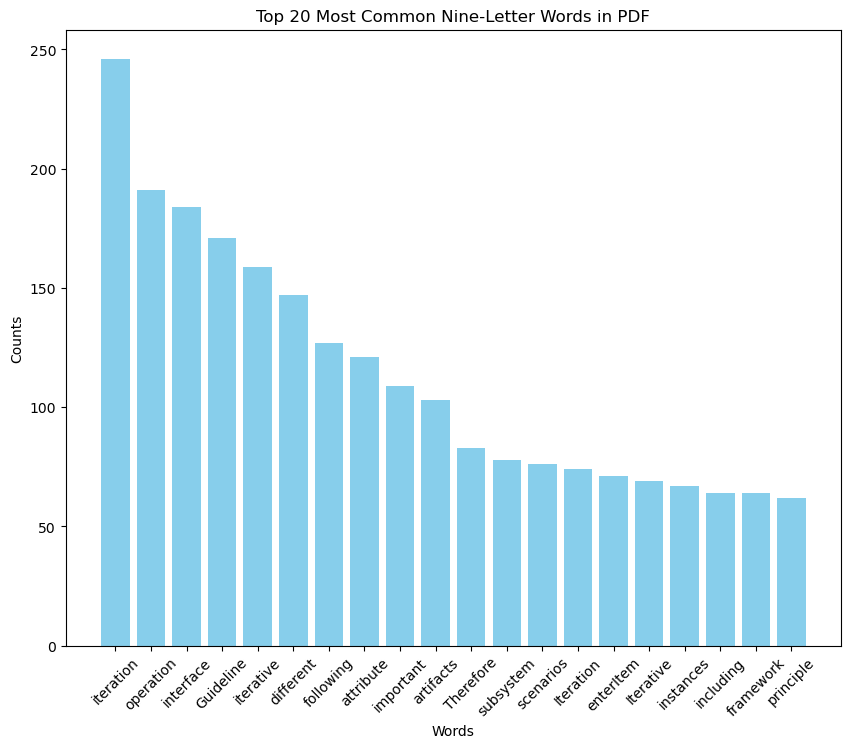

In [ ]:
# Importer nødvendige biblioteker
import re
import PyPDF2
from collections import Counter
import matplotlib.pyplot as plt

# Funktion til at udtrække tekst fra en PDF-fil
def extract_text_from_pdf(pdf_file):
    text = ""
    with open(pdf_file, "rb") as file:
        reader = PyPDF2.PdfFileReader(file)
        num_pages = reader.numPages
        for page_num in range(num_pages):
            page = reader.getPage(page_num)
            text += page.extractText()
    return text

# Funktion til at finde ni-bogstavs ord og tælle dem
def find_nine_letter_words(text):
    nine_letter_words = re.findall(r'\b[a-zA-Z]{9}\b', text)
    return Counter(nine_letter_words)

# Funktion til at plotte de mest almindelige ord
def plot_most_common_words(words_counter, n=10):
    most_common_words = words_counter.most_common(n)
    words = [word[0] for word in most_common_words]
    counts = [word[1] for word in most_common_words]
    
    plt.figure(figsize=(10, 8))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.title(f'Top {n} Most Common Nine-Letter Words in PDF')
    plt.show()

# Hovedfunktion til at køre dit script
def main():
    pdf_file = (r"./data/Applying_UML_and_Patterns_3rd_Edition.pdf")  # Change this to your PDF file path
    text = extract_text_from_pdf(pdf_file)
    nine_letter_words_counter = find_nine_letter_words(text)
    
    # Print de mest almindelige ni-bogstavs ord
    print("Top nine-letter words found in the PDF:")
    for word, count in nine_letter_words_counter.most_common(20):
        print(f"{word}: {count}")
    
    # Plot grafen
    plot_most_common_words(nine_letter_words_counter, 20)

# Kør main funktionen
if __name__ == "__main__":
    main()
